Algorithm       Time (s)        Time Complexity
Bubble Sort     0.05821         O(n^2)         
Merge Sort      0.00196         O(n log n)     
Quick Sort      0.00100         O(n log n)     


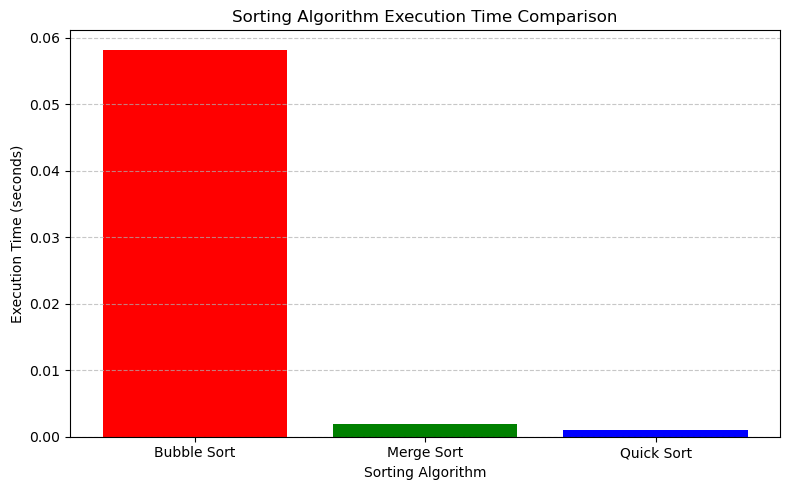

In [6]:
#TASK 1 (A)
import random
import time
import matplotlib.pyplot as plt

data = [random.randint(1, 10000) for _ in range(1000)]

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr)//2
        L = arr[:mid]
        R = arr[mid:]
        merge_sort(L)
        merge_sort(R)
        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0]
        less = [x for x in arr[1:] if x < pivot]
        greater = [x for x in arr[1:] if x >= pivot]
        return quick_sort(less) + [pivot] + quick_sort(greater)

def measure_time(func, arr):
    start = time.time()
    if func == quick_sort:
        func(arr)
    else:
        func(arr)
    end = time.time()
    return end - start

bubble_data = data.copy()
merge_data = data.copy()
quick_data = data.copy()

bubble_time = measure_time(bubble_sort, bubble_data)
merge_time = measure_time(merge_sort, merge_data)
quick_time = measure_time(quick_sort, quick_data)

results = {
    "Algorithm": ["Bubble Sort", "Merge Sort", "Quick Sort"],
    "Time (s)": [bubble_time, merge_time, quick_time],
    "Time Complexity": ["O(n^2)", "O(n log n)", "O(n log n)"]
}

print("{:<15} {:<15} {:<15}".format("Algorithm", "Time (s)", "Time Complexity"))
for i in range(3):
    print("{:<15} {:<15.5f} {:<15}".format(results["Algorithm"][i], results["Time (s)"][i], results["Time Complexity"][i]))

plt.figure(figsize=(8, 5))
plt.bar(results["Algorithm"], results["Time (s)"], color=['red', 'green', 'blue'])
plt.xlabel('Sorting Algorithm')
plt.ylabel('Execution Time (seconds)')
plt.title('Sorting Algorithm Execution Time Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [7]:
#Task 2: Recursive vs Iterative Approach
import time
from functools import lru_cache

def fib_recursive(n):
    if n <= 1:
        return n
    return fib_recursive(n-1) + fib_recursive(n-2)

def fib_iterative(n):
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a

@lru_cache(maxsize=None)
def fib_memoized(n):
    if n <= 1:
        return n
    return fib_memoized(n-1) + fib_memoized(n-2)

def measure_time(func, n):
    start = time.time()
    result = func(n)
    end = time.time()
    return result, end - start

n_values = [10, 20, 30, 40]
results = []

for n in n_values:
    rec_result, rec_time = measure_time(fib_recursive, n)
    iter_result, iter_time = measure_time(fib_iterative, n)
    memo_result, memo_time = measure_time(fib_memoized, n)
    results.append({
        "n": n,
        "Recursive Time (s)": rec_time,
        "Iterative Time (s)": iter_time,
        "Memoized Time (s)": memo_time,
        "Result": rec_result  # All methods should return the same
    })

print("{:<5} {:<20} {:<20} {:<20} {:<10}".format("n", "Recursive Time (s)", "Iterative Time (s)", "Memoized Time (s)", "Fib(n)"))
for r in results:
    print("{:<5} {:<20.6f} {:<20.6f} {:<20.6f} {:<10}".format(r["n"], r["Recursive Time (s)"], r["Iterative Time (s)"], r["Memoized Time (s)"], r["Result"]))


n     Recursive Time (s)   Iterative Time (s)   Memoized Time (s)    Fib(n)    
10    0.000000             0.000000             0.000000             55        
20    0.001509             0.000000             0.000000             6765      
30    0.214199             0.000000             0.000000             832040    
40    20.253838            0.000000             0.000000             102334155 


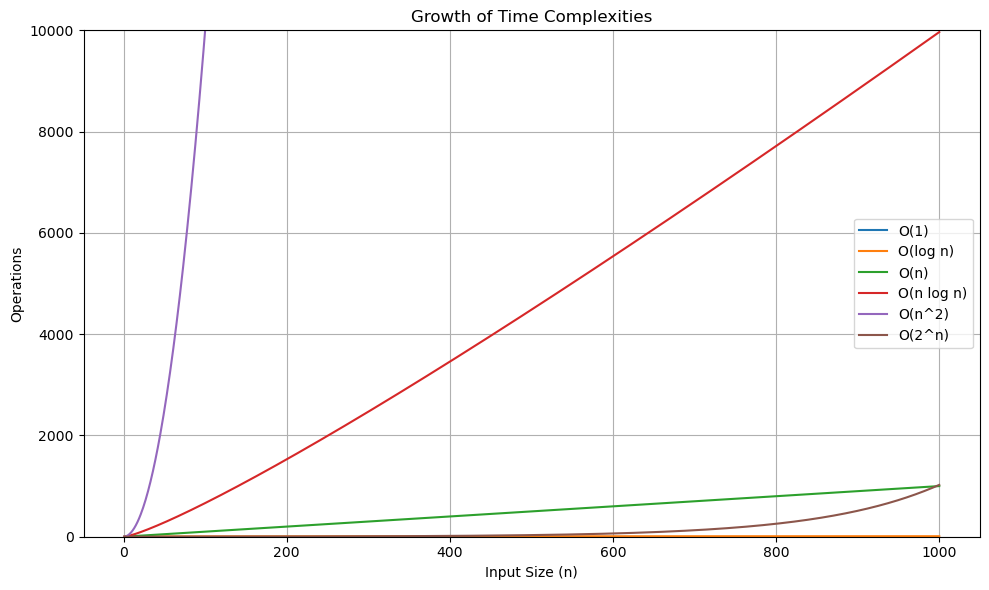

In [9]:
#Task 3: Visualizing Big-O Notation
import matplotlib.pyplot as plt
import numpy as np

# Input sizes from 1 to 1000
n_values = np.arange(1, 1001)

# Complexity functions
def constant(n):
    return np.ones_like(n)

def log_n(n):
    return np.log2(n)

def linear(n):
    return n

def n_log_n(n):
    return n * np.log2(n)

def quadratic(n):
    return n ** 2

def exponential(n):
    return 2 ** (n / 100)  # scaled down for visibility

# Compute output values
functions = {
    "O(1)": constant(n_values),
    "O(log n)": log_n(n_values),
    "O(n)": linear(n_values),
    "O(n log n)": n_log_n(n_values),
    "O(n^2)": quadratic(n_values),
    "O(2^n)": exponential(n_values)
}

# Plot
plt.figure(figsize=(10, 6))
for label, y in functions.items():
    plt.plot(n_values, y, label=label)

plt.title("Growth of Time Complexities")
plt.xlabel("Input Size (n)")
plt.ylabel("Operations")
plt.ylim(0, 10000)  # Adjust to keep the plot readable
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
